# Tasks from meeting on the 28th.

1. beamforming on basebanded signal vs basebanding beamformer 
2. comparison of the beam arrival times between beamformer and corrilation


In [1]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import pandas as pd
from os.path import join

from kam11 import context, matchedFilter, thermister, rayModeling
from beamforming import curvedWaveFront, timeDomain, beam_correlations

from kam11.plotting import mfPlotting
from kam11.plotting import beamformer as plot_beamformer
from kam11.helper.baseband import baseband

In [3]:
timeOfInterest='2011 J184 03:51:15'
loadDuration=dt.timedelta(0,5)
tof = dt.datetime.strptime(timeOfInterest, '%Y J%j %H:%M:%S')
savefolder = '/Users/edwardlrichards/ipythonNotebooks/nogit/beamformer_083015'
thetaRange=(-8,8)
numTheta=1e3
beamformingRange=(-6,2)
numBeams=1e3
snap_index = 10
uprate = 5

ssp=thermister.getSoundSpeed(tof)

In [4]:
#basic plots for time of interest
look_theta = np.r_[thetaRange[0]:thetaRange[1]:numTheta*1j]
look_tau = np.r_[beamformingRange[0]:beamformingRange[1]:numBeams*1j]

mf = matchedFilter.mf_bytime(tof, loadDuration, baseband=True)
test_delay=curvedWaveFront.getDelays(look_theta, ssp, mf.rd, mf.rd[1])

ts, mf_time = mf.single_index(snap_index)
bf = timeDomain.ShiftAndAdd(ts, upsample=5)
beam_result = bf.beamform(look_tau, test_delay)

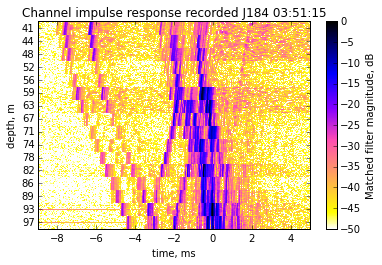

In [5]:
ax = mfPlotting.plotMultipleChannel(mf, tStart=-9, tEnd=5, vmin=-50,
                                    norm='total')

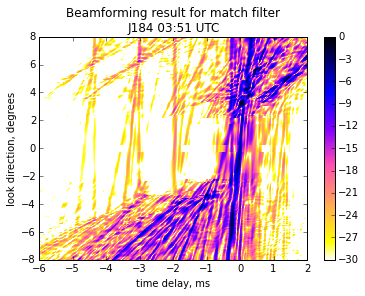

In [6]:
ax=plot_beamformer.plot_beamformer(look_theta, look_tau,
                                   beam_result, tof)

In [7]:
maxAngle = beam_correlations.maxangle(beam_result,
                                      (-5, -4), (4,8))

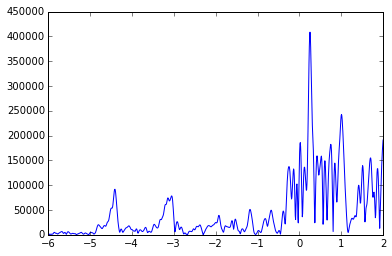

In [8]:
_=plt.plot(beam_result.index, np.abs(beam_result[maxAngle]))

In [9]:
%autoreload
max_delays = test_delay.ix[maxAngle]

mf = matchedFilter.mf_bytime(tof, loadDuration, baseband=False)
ts, mf_time = mf.single_index(snap_index)

bf = timeDomain.ShiftAndAdd(ts, upsample=5)
beam_nb = bf.beamform(np.array(ts.index), max_delays)
bb_beam = baseband(beam_nb)

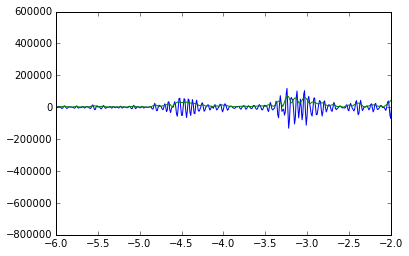

In [10]:
_ = plt.plot(beam_nb.index, np.real(beam_nb))
_ = plt.plot(bb_beam.index, np.abs(bb_beam))
_ = plt.xlim(-6,-2)

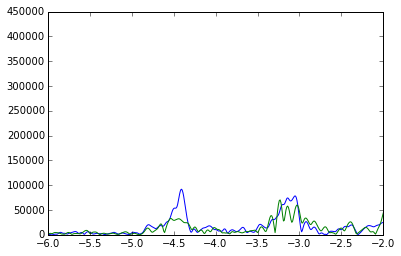

In [11]:
_=plt.plot(beam_result.index, np.abs(beam_result[maxAngle]))
_ = plt.plot(bb_beam.index, np.abs(bb_beam))
_ = plt.xlim(-6,-2)

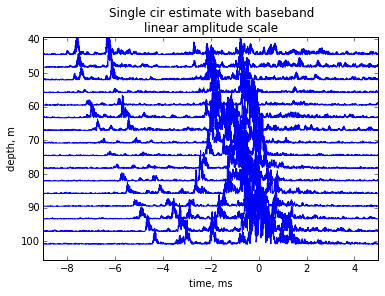

In [13]:
ax=mfPlotting.plot_ts(np.abs(ts), tStart=-9, tEnd=5,
                             isDB=False, vmin=-3e4, vmax=1e5)
_=ax.set_title('Single cir estimate with baseband'+
              '\nlinear amplitude scale')

In [14]:
mf = matchedFilter.mf_bytime(tof, loadDuration, baseband=False)
ts, mf_time = mf.single_index(snap_index)

bf = timeDomain.ShiftAndAdd(ts, upsample=5)
beam_result = bf.beamform(look_tau, test_delay)

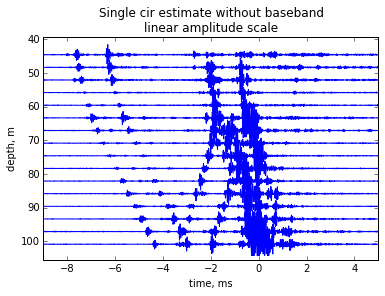

In [15]:
ax=mfPlotting.plot_ts(ts, tStart=-9, tEnd=5,
                             isDB=False, vmin=-1e5, vmax=1e5)
_=ax.set_title('Single cir estimate without baseband'+
              '\nlinear amplitude scale')

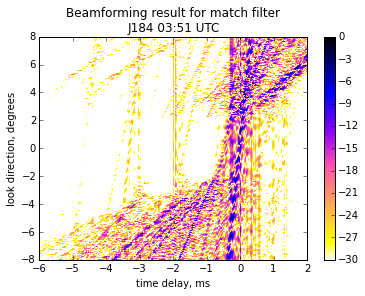

In [16]:
ax=plot_beamformer.plot_beamformer(look_theta, look_tau,
                                   beam_result, tof)

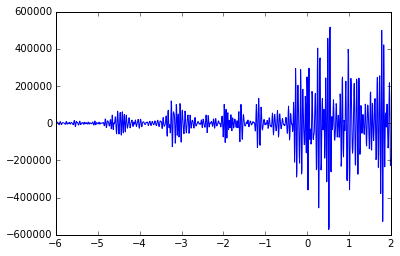

In [17]:
lookIndex = beam_result.columns[beam_result.columns > 6][0]
test_ts = beam_result[lookIndex]
test_t = test_ts.index
test_ts = np.real(test_ts)
_=plt.plot(test_t, test_ts)
# _=plt.xlim(-5, -4)

/usr/local/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


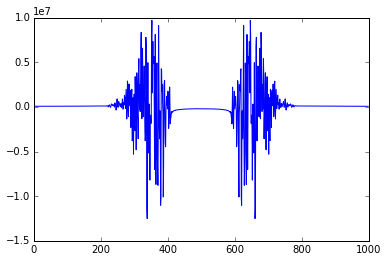

In [18]:
_=plt.plot(np.fft.fftshift(np.fft.fft(test_ts)))

In [19]:
#extend tau by 127 samples to match base band filter length
filterDrop = 127
dtau = look_tau[1] - look_tau[0]
bb_tau = np.arange(numBeams + filterDrop) * dtau
bb_tau -= max(bb_tau)
bb_tau += max(look_tau)

bf = timeDomain.ShiftAndAdd(ts, upsample=5)
beam_result = bf.beamform(bb_tau, test_delay)

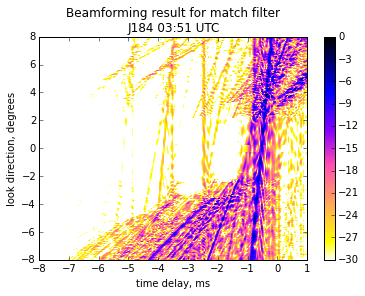

In [20]:
bb_beam=baseband(beam_result)
ax=plot_beamformer.plot_beamformer(look_theta, bb_tau[:-filterDrop],
                                   bb_beam, tof)

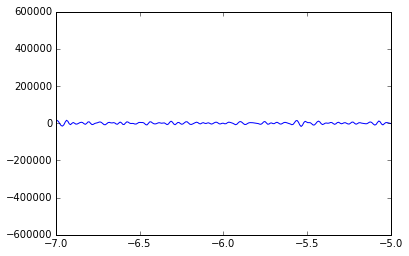

In [21]:
lookIndex = beam_result.columns[beam_result.columns > 6][0]
test_ts = beam_result[lookIndex]
test_t = test_ts.index
test_ts = np.real(test_ts)
_=plt.plot(test_t, test_ts)
_=plt.xlim(-7, -5)

In [22]:
# find and plot time series for the max angle of interest
tbounds=(-5, -4)
anglebounds = (5, 7)
signal_bounds = (-5, -4)

maxangle = beam_corrilations.maxangle(beam_result, tbounds, anglebounds)
beam_ts = beam_result[maxangle]
beam_ts = beam_ts[(beam_ts.index > min(signal_bounds)) &
                  (beam_ts.index < max(signal_bounds))]

NameError: name 'beam_corrilations' is not defined

In [ ]:
_=plt.plot(beam_result.index, beam_result[maxangle])
_=plt.plot(beam_ts.index, beam_ts)

In [ ]:
max_delay = test_delay.ix[maxangle]
ax=mfPlotting.plot_ts(ts, tStart = -5, tEnd = -4, isDB=False, vmin=-1e5, vmax=1e5, channel_delays=max_delay)
ax.grid()